# Dimensionality Reduction

## Table of Content

1. **[PCA](#1)**
2. **[DT Classifier Before Applying PCA](#2)**  
3. **[DT After Applying PCA](#3)** 
4. **[DT After Applying LDA](#4)**

    4.1. **[Hyperparameter tunning of LDA](#4.1)** 

<a id = "1"> </a>
## 1.PCA

##  Objectives:-
### 1) Signal-noise ratio
### 2) Data correlation and information redundancy 

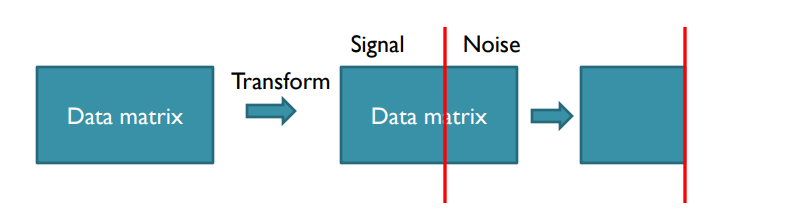

In [1]:
from IPython.display import Image
Image('snr.PNG')

- Correlation can be removed by rotating the data point or coordinate

## Signal and Noise
- The terms signal and noise are used in many different contexts, but we'll explore what they mean in a physical engineering or statistical sense. 
- The terms actually come from radio engineering, in which a signal is the noise-free signal and noise is the white noise you hear when you can't tune a radio to a particular station. 
- Signal processing is the statistical technique used to extract information from the raw signal

## Signal to Noise Ratio(SNR)
- In order to determine the strength of a signal it is necessary to calculate what is called the signal-to-noise-ratio (SNR).
- The higher the ratio, the easier it becomes to detect a true signal or extract useful information from the raw signal.
- Thus, it is defined as the ratio as the power (P) of a signal to the power (P) of the background noise.
- The knowledge of this ratio has many important applications in applied mathematics, analytical chemistry, electronics, and the geosciences.
- In electronics, signal and noise are measured in decibels, a measure of volume.
- In other disciplines, the SNR is also known as the effect size.

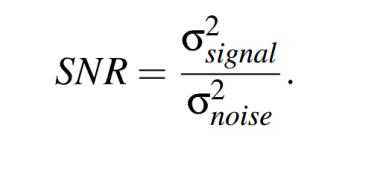

In [2]:
from IPython.display import Image
Image('snrformula.PNG')

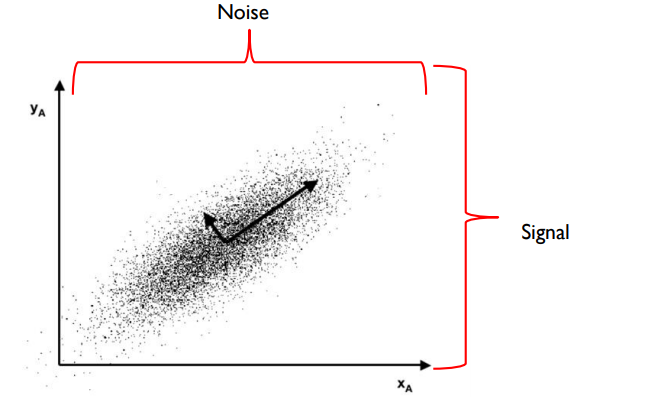

In [3]:
from IPython.display import Image
Image('snr3.PNG')

## MAXIMIZE SNR 
- Keep one signal dimension, discard one noisy dimension

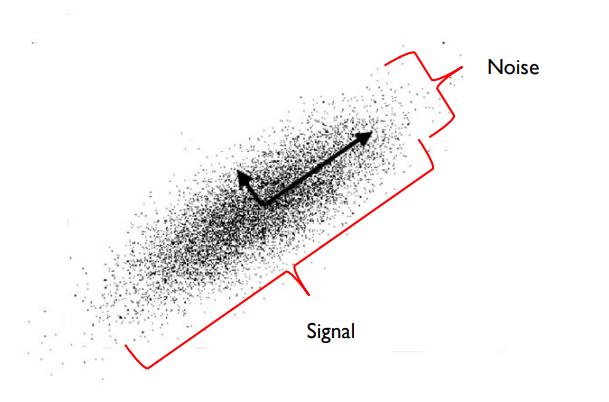

In [4]:
from IPython.display import Image
Image('snr4.PNG')

- In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set.
- It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.
- With fewer variables, visualization also becomes much more meaningful.
- PCA is more useful when dealing with 3 or higher dimensional data.

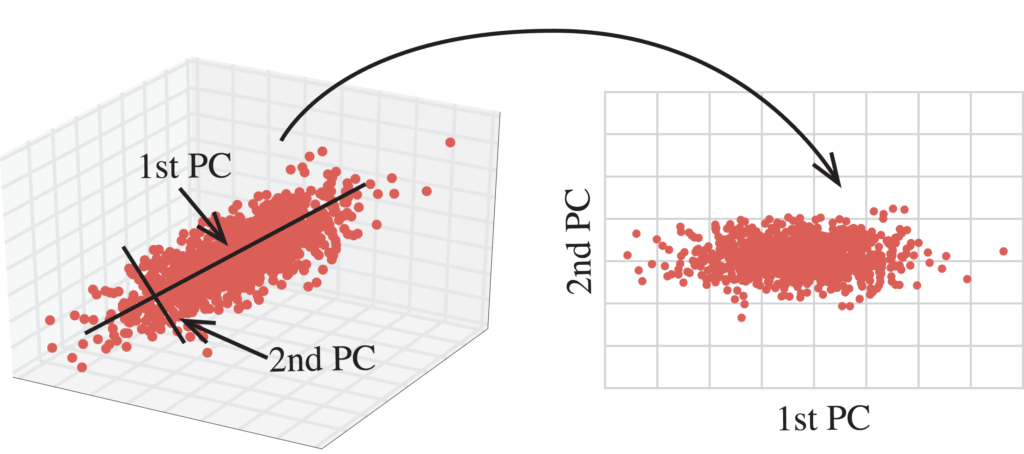

In [5]:
from IPython.display import Image
Image('iris.png')

#### What are principal components ?
- A principal component is a normalized linear combination of the original predictors in a data set. In image above, PC1 and PC2 are the principal components. 
- Let’s say we have a set of predictors as X¹, X²...,Xp
- The principal component can be written as:
  - Z¹ = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp
  - where,Z¹ is first principal component
  - Φp¹ is the loading vector comprising of loadings (Φ¹, Φ²..) of first principal component. 
  - The loadings are constrained to a sum of square equals to 1. 
  - This is because large magnitude of loadings may lead to large variance.
  - It also defines the direction of the principal component (Z¹) along which data varies the most.
  - It results in a line in p dimensional space which is closest to the n observations. Closeness is measured using average squared euclidean distance.
  - X¹..Xp are normalized predictors. Normalized predictors have mean equals to zero and standard deviation equals to one.
- Therefore,`First principal component` is a linear combination of original predictor variables which captures the maximum variance in the data set.
- It determines the direction of highest variability in the data. Larger the variability captured in first component, larger the information captured by component.
- No other component can have variability higher than first principal component.
- The first principal component results in a line which is closest to the data i.e. it minimizes the sum of squared distance between a data point and the line.
- `Second principal component (Z²)` is also a linear combination of original predictors which captures the remaining variance in the data set and is uncorrelated with Z¹. 
- In other words, the correlation between first and second component should is zero.
- It can be represented as:
  - Z² = Φ¹²X¹ + Φ²²X² + Φ³²X³ + .... + Φp2Xp

- If the two components are uncorrelated, their directions should be orthogonal (image below).
- This image is based on a simulated data with 2 predictors. 
- Notice the direction of the components, as expected they are orthogonal. This suggests the correlation b/w these components in zero.

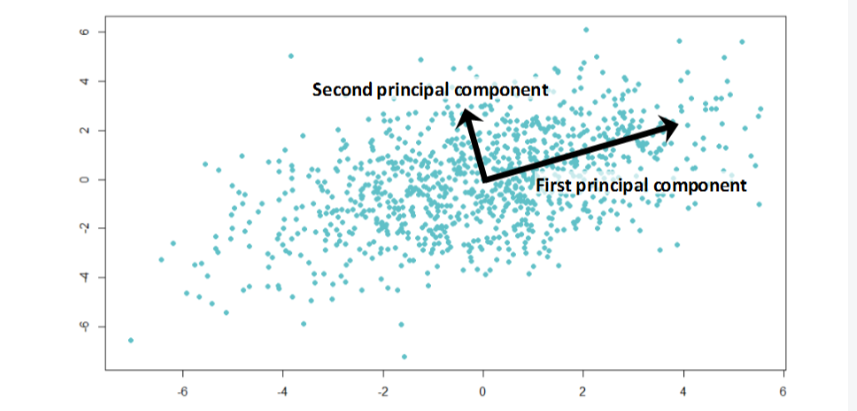

In [6]:
from IPython.display import Image
Image('5.PNG')

- All succeeding principal component follows a similar concept i.e. they capture the remaining variation without being correlated with the previous component.
- In general, for n × p dimensional data, min(n-1, p) principal component can be constructed.
- The directions of these components are identified in an unsupervised way i.e. the response variable(Y) is not used to determine the component direction.
- Therefore, it is an `unsupervised approach.`

- **Eigenvectors**:
  - Eigenvectors and Eigenvalues are in itself a big domain, let’s restrict ourselves to the knowledge of the same which we would require here. 
  - So, consider a non-zero vector v. 
  - It is an eigenvector of a square matrix A, if Av is a scalar multiple of v.
  - Or simply: Av = ƛv
  - Here, v is the eigenvector and ƛ is the eigenvalue associated with it.

- **Covariance Matrix**: 
  - This matrix consists of the covariances between the pairs of variables.
  - The (i,j)th element is the covariance between i-th and j-th variable.

# Implement PCA in Python

## PCA: algorithm
 - 1) Subtract mean
 - 2) Calculate the covariance matrix
 - 3) Calculate eigenvectors and eigenvalues of the covariance matrix
 - 4) Rank eigenvectors by its corresponding eigenvalues
 - 5) Obtain P with its column vectors corresponding to the top k eigenvectors

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries

import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
%matplotlib inline

## Step 1: Normalize the data

- First step is to normalize the data that we have so that PCA works properly.
- This is done by subtracting the respective means from the numbers in the respective column.
- So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.

In [8]:
iris = datasets.load_iris()
X = iris.data

X_std = StandardScaler().fit_transform(X)

## Step 2: Calculate the covariance matrix

In [9]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


## Understand the data using pair plot

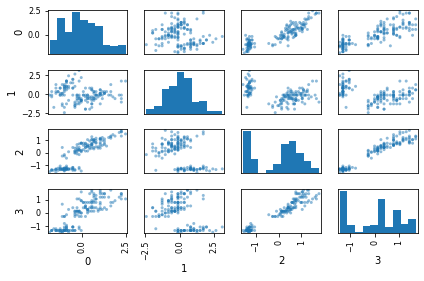

In [10]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

## Step 3: Calculate the eigenvalues and eigenvectors

In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [12]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

 Eigen Values 
%s [2.93808505 0.9201649  0.14774182 0.02085386]


In [13]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [14]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


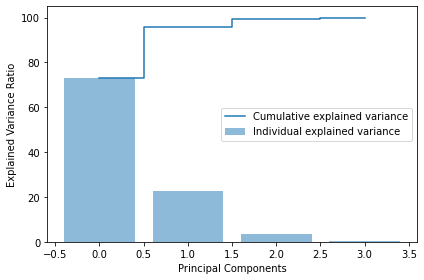

In [15]:
plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [16]:
# First three principal components explain 99% of the variance in the data. The first three PCA is shown below
# The three PCA will have to be named because they represent composite of original dimensions

([], [])

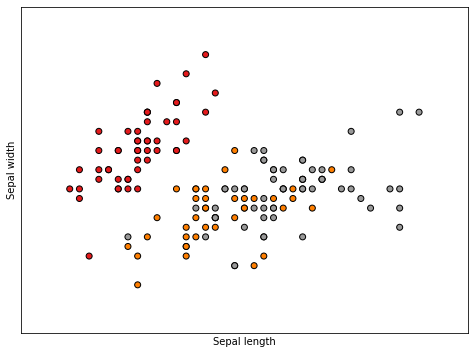

In [17]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



In [18]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id = "2"> </a>
# 2. DT Classifier Before Applying PCA

In [20]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [21]:
y_pred_DT = model.predict(X_test)

In [22]:
cm_DT= confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[11,  0,  0],
       [ 0,  7,  6],
       [ 0,  4,  2]], dtype=int64)

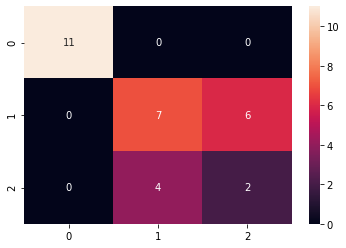

In [23]:
sns.heatmap(cm_DT, annot=True)
plt.show()

In [24]:
classification=classification_report(y_test,y_pred_DT)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.64      0.54      0.58        13
           2       0.25      0.33      0.29         6

    accuracy                           0.67        30
   macro avg       0.63      0.62      0.62        30
weighted avg       0.69      0.67      0.68        30



In [25]:
ac = accuracy_score(y_test, y_pred_DT)
print("Accuracy Score:", ac)

Accuracy Score: 0.6666666666666666


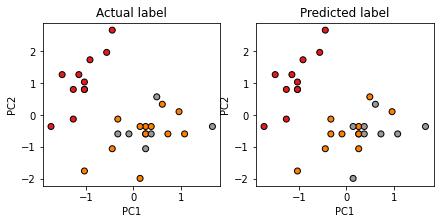

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Plot the training points (scatter plot, all rows first and second column only)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1,alpha = 1, edgecolor='k')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Actual label')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_DT, cmap=plt.cm.Set1,alpha = 1,  edgecolor='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Predicted label')
plt.show()

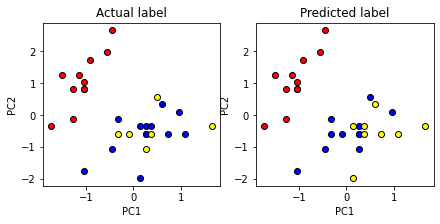

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Plot the training points (scatter plot, all rows first and second column only)
ax[0].scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], c='red',alpha = 1, edgecolor='k')
ax[0].scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], c='blue',alpha = 1, edgecolor='k')
ax[0].scatter(X_test[:, 0][y_test == 2], X_test[:, 1][y_test == 2], c='yellow',alpha = 1, edgecolor='k')

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Actual label')
ax[1].scatter(X_test[:, 0][y_pred_DT == 0], X_test[:, 1][y_pred_DT == 0], c='red',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred_DT == 1], X_test[:, 1][y_pred_DT == 1], c='blue',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred_DT == 2], X_test[:, 1][y_pred_DT == 2], c='yellow',alpha = 1,  edgecolor='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Predicted label')
plt.show()

<a id = "3"> </a>
# 3. DT After Applying PCA

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [31]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.53028305, 0.46971695])

In [32]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)


DecisionTreeClassifier()

In [33]:
y_pred_DT_2 = model2.predict(X_test_2)

In [34]:
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

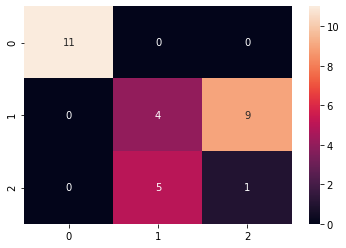

In [35]:
sns.heatmap(cm_PCA, annot=True)
plt.show()

In [36]:
ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

Accuracy Score: 0.5333333333333333


In [37]:
classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.44      0.31      0.36        13
           2       0.10      0.17      0.12         6

    accuracy                           0.53        30
   macro avg       0.51      0.49      0.50        30
weighted avg       0.58      0.53      0.55        30



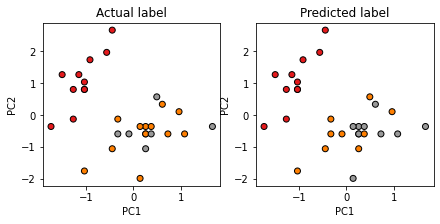

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Plot the training points (scatter plot, all rows first and second column only)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1,alpha = 1, edgecolor='k')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Actual label')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_DT_2, cmap=plt.cm.Set1,alpha = 1,  edgecolor='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Predicted label')
plt.show()

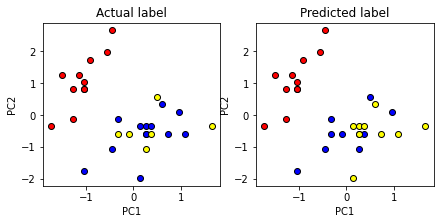

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Plot the training points (scatter plot, all rows first and second column only)
ax[0].scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], c='red',alpha = 1, edgecolor='k')
ax[0].scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], c='blue',alpha = 1, edgecolor='k')
ax[0].scatter(X_test[:, 0][y_test == 2], X_test[:, 1][y_test == 2], c='yellow',alpha = 1, edgecolor='k')

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Actual label')
ax[1].scatter(X_test[:, 0][y_pred_DT_2 == 0], X_test[:, 1][y_pred_DT_2 == 0], c='red',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred_DT_2 == 1], X_test[:, 1][y_pred_DT_2 == 1], c='blue',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred_DT_2 == 2], X_test[:, 1][y_pred_DT_2 == 2], c='yellow',alpha = 1,  edgecolor='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Predicted label')
plt.show()

##  Pros and Cons of PCA :-

## Pros :-
- Remove Noise
- Can deal with large datasets

## Cons :-
- hard to interpret
- sample dependent
- linear

<a id = "4"> </a>
# 4. DT After Applying LDA

In [40]:
# create the lda model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm_LDA= confusion_matrix(y_test, y_pred)

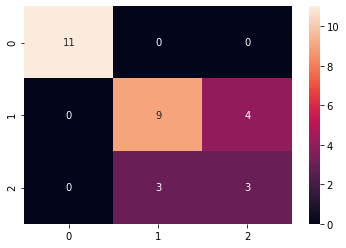

In [46]:
sns.heatmap(cm_LDA, annot=True)
plt.show()

In [47]:
ac_LDA = accuracy_score(y_test, y_pred)
print("Accuracy Score:", ac_LDA)

Accuracy Score: 0.7666666666666667


In [48]:
classification_2=classification_report(y_test,y_pred)
print(classification_2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      0.69      0.72        13
           2       0.43      0.50      0.46         6

    accuracy                           0.77        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.78      0.77      0.77        30



<a id = "4.1"> </a>
# 4.1. Hyperparameter tunning of LDA

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
#grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.822
Config: {'solver': 'svd'}


In [50]:
model = LinearDiscriminantAnalysis(solver = 'svd')

In [51]:
model1 = model.fit(X_train,y_train)

In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
cm_LDA= confusion_matrix(y_test, y_pred)

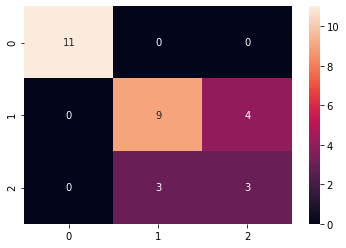

In [54]:
sns.heatmap(cm_LDA, annot=True)
plt.show()

In [55]:
ac_LDA = accuracy_score(y_test, y_pred)
print("Accuracy Score:", ac_LDA)

Accuracy Score: 0.7666666666666667


In [56]:
classification_2=classification_report(y_test,y_pred)
print(classification_2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      0.69      0.72        13
           2       0.43      0.50      0.46         6

    accuracy                           0.77        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.78      0.77      0.77        30



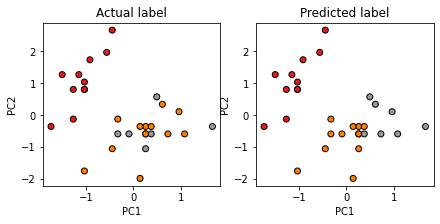

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Plot the training points (scatter plot, all rows first and second column only)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1,alpha = 1, edgecolor='k')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Actual label')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Set1,alpha = 1,  edgecolor='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Predicted label')
plt.show()

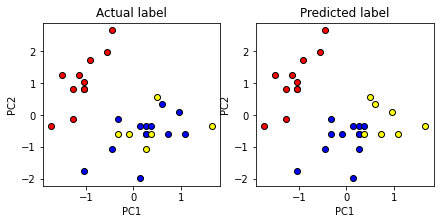

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Plot the training points (scatter plot, all rows first and second column only)
ax[0].scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], c='red',alpha = 1, edgecolor='k')
ax[0].scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], c='blue',alpha = 1, edgecolor='k')
ax[0].scatter(X_test[:, 0][y_test == 2], X_test[:, 1][y_test == 2], c='yellow',alpha = 1, edgecolor='k')

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Actual label')
ax[1].scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], c='red',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='blue',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred == 2], X_test[:, 1][y_pred == 2], c='yellow',alpha = 1,  edgecolor='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Predicted label')
plt.show()

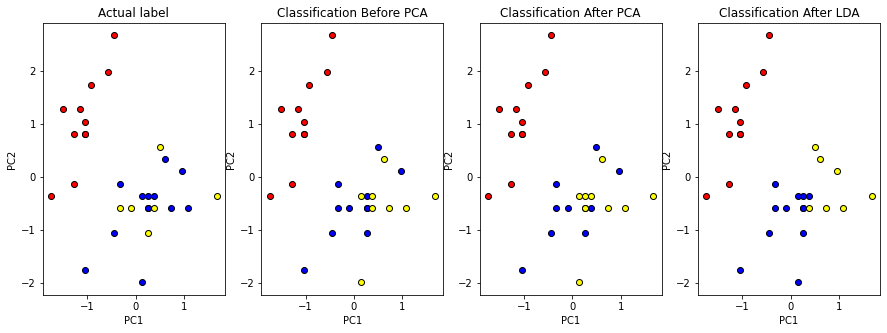

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Plot the training points (scatter plot, all rows first and second column only)
ax[0].scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], c='red',alpha = 1, edgecolor='k')
ax[0].scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], c='blue',alpha = 1, edgecolor='k')
ax[0].scatter(X_test[:, 0][y_test == 2], X_test[:, 1][y_test == 2], c='yellow',alpha = 1, edgecolor='k')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Actual label')

ax[1].scatter(X_test[:, 0][y_pred_DT == 0], X_test[:, 1][y_pred_DT == 0], c='red',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred_DT == 1], X_test[:, 1][y_pred_DT == 1], c='blue',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred_DT == 2], X_test[:, 1][y_pred_DT == 2], c='yellow',alpha = 1,  edgecolor='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Classification Before PCA')


ax[2].scatter(X_test[:, 0][y_pred_DT_2 == 0], X_test[:, 1][y_pred_DT_2 == 0], c='red',alpha = 1,  edgecolor='k')
ax[2].scatter(X_test[:, 0][y_pred_DT_2 == 1], X_test[:, 1][y_pred_DT_2 == 1], c='blue',alpha = 1,  edgecolor='k')
ax[2].scatter(X_test[:, 0][y_pred_DT_2 == 2], X_test[:, 1][y_pred_DT_2 == 2], c='yellow',alpha = 1,  edgecolor='k')
ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2')
ax[2].set_title('Classification After PCA')


ax[3].scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], c='red',alpha = 1,  edgecolor='k')
ax[3].scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='blue',alpha = 1,  edgecolor='k')
ax[3].scatter(X_test[:, 0][y_pred == 2], X_test[:, 1][y_pred == 2], c='yellow',alpha = 1,  edgecolor='k')
ax[3].set_xlabel('PC1')
ax[3].set_ylabel('PC2')
ax[3].set_title('Classification After LDA')
plt.show()